**0)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install mlflow

**1)Reading the dataset and loading the correlations with the target**

In [ ]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
poly_corr = pd.read_csv('correlations.csv')                         #this CSV contains all the correlations with the target of the polynomial features which will be further created 
data = data.sample(frac=1)
print("Dataset size: ", data.shape)
print(data.columns)
print("\n",data.head())
print("\ndiabetes has label 0")
print("pre-diabetes has label 1")
print("non-diabetes has label 2\n")
d = dict(Counter(data['Diabetes_012'].values))
for el in d:
  print(round(d[el]/data.shape[0]*100,2),"% of data is label ",int(el))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


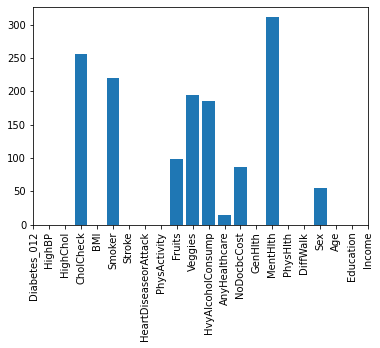

In [9]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

predictors = list(data.columns)

# Perform feature selection
selector = SelectKBest(f_classif)
selector.fit(data[predictors], data["Diabetes_012"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [16]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
kbest_data = data[data].copy#:len(data)//10].copy()
kbest_data.pop('HighBP')
kbest_data.pop('HighChol')
kbest_data.pop('BMI')
kbest_data.pop('Stroke')
kbest_data.pop('HeartDiseaseorAttack')
kbest_data.pop('PhysActivity')
kbest_data.pop('GenHlth')
kbest_data.pop('PhysHlth')
kbest_data.pop('DiffWalk')
kbest_data.pop('Age')
kbest_data.pop('Education')
kbest_data.pop('Income')


In [6]:
data=kbest_data
data.head()

,Diabetes_012,CholCheck,Smoker,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,Sex
194346,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31209,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
70445,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
241720,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
250993,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,30.0,0.0


In [ ]:
print("Number of null values for every feature and the target")
print(data.isnull().sum())
print("\nNumber of N/A values for every feature and the target")
data.isna().sum()

In [5]:
data2 = pd.DataFrame(data['Diabetes_012'], data['BMI'])

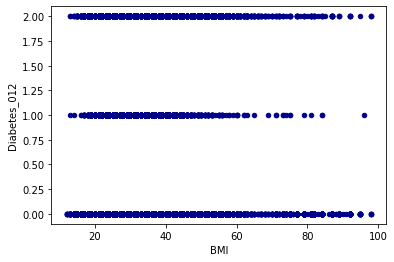

In [11]:
plot = data.plot.scatter(x='BMI', y='Diabetes_012', c='DarkBlue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda765e4950>,
      dtype=object)

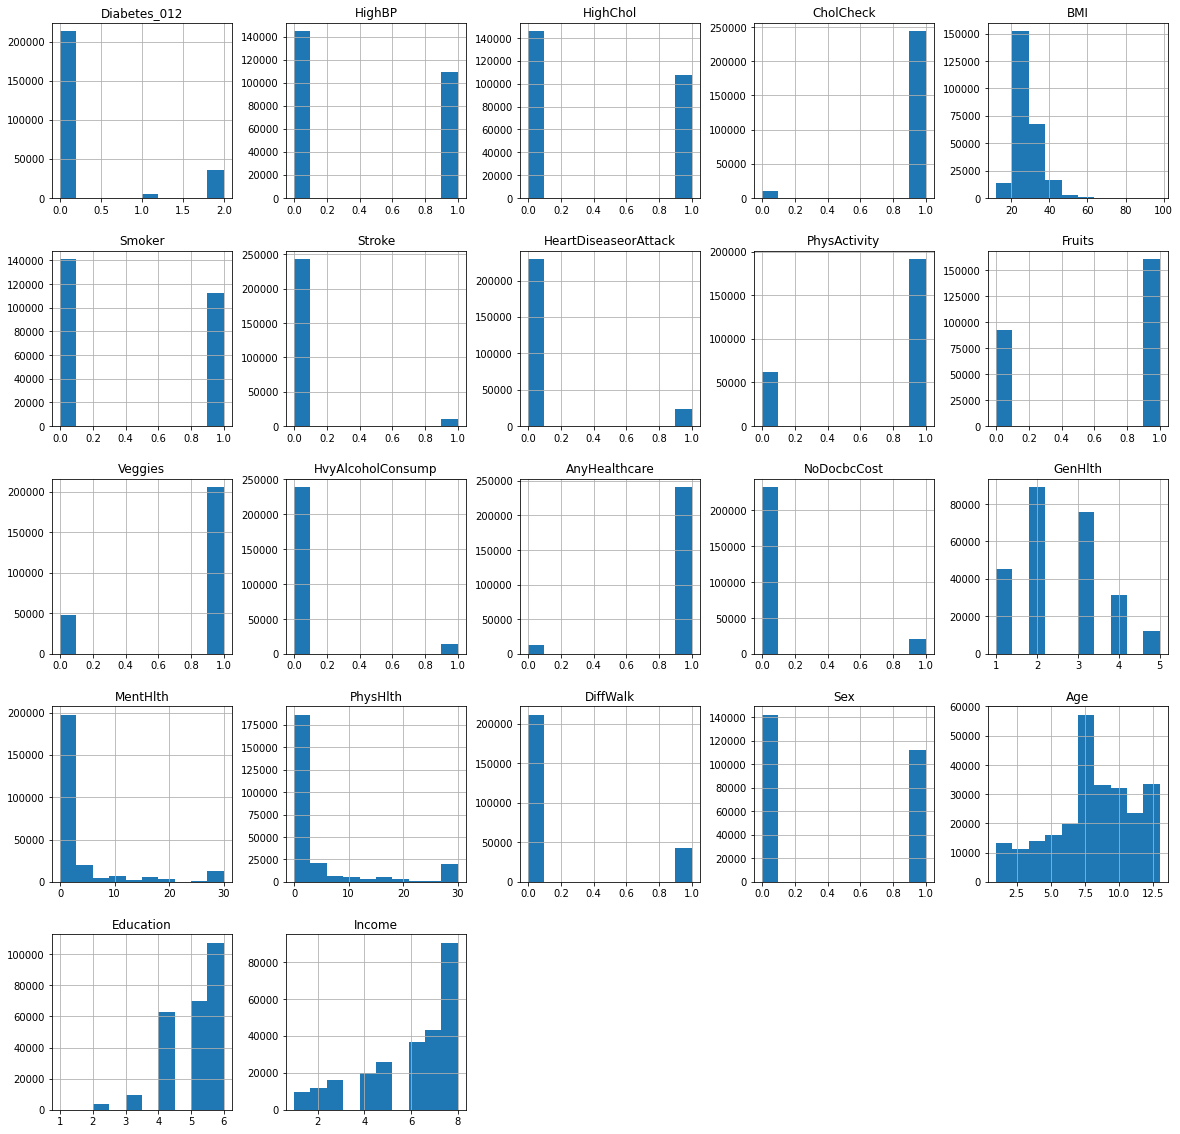

In [4]:
data.hist(figsize=(20,20))

In [ ]:
print("Sets of all the values for every feature")

for column in list(data.columns):
  print(column,": ",set(data[column].values))             #check for outliers

In [ ]:
print("Correlation matrix\n")
corr_mx = data.corr() # uses pearson correlation coeff by default

for idx in range(corr_mx.shape[0]):
    corr_mx.iloc[idx, idx] = 0

sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(corr_mx, annot=True)
plt.show()

In [ ]:
corr_mx.max()

**2*) Run only when polynomial features are involved**

In [22]:
additional_features = poly_corr[poly_corr['corr'].abs()>0.34]['Polynomial features'].values
for ftr in additional_features:
  el = ftr.split()
  data["".join(el)] = (data[el[0]]**(float(el[2]))) * (data[el[4]]**(float(el[-1])))

#remove polynomial features with relatively high skewness
data.pop('HighBP^0.5*GenHlth^2.0')
data.pop('HighBP^1.0*GenHlth^2.0')
data.pop('HighBP^1.5*GenHlth^2.0')
data.pop('HighBP^2.0*GenHlth^2.0')
data.pop('HighBP^2.5*GenHlth^2.0')

39168     4.0
42472     9.0
223795    4.0
12673     4.0
230665    0.0
         ... 
157607    0.0
109019    0.0
56553     0.0
190460    0.0
22222     0.0
Name: HighBP^2.5*GenHlth^2.0, Length: 253680, dtype: float64

In [5]:
X.shape

(253680, 21)

**3) Train/Test split**

In [23]:
X = data.copy()
Y = X.pop('Diabetes_012')
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=20)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(202944, 30)
(202944,)
(50736, 30)
(50736,)


In [ ]:
print(X_train.columns)

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI^0.5*GenHlth^0.5', 'HighBP^0.5*GenHlth^1.5', 'BMI^1.0*GenHlth^1.0',
       'HighBP^1.0*GenHlth^1.5', 'BMI^1.0*GenHlth^1.5', 'BMI^1.0*GenHlth^2.0',
       'HighBP^1.5*GenHlth^1.5', 'HighBP^2.0*GenHlth^1.5',
       'HighBP^2.5*GenHlth^1.5'],
      dtype='object')


**4*) (Run only for input that include skewness adjustment) Adjust skewed data**
(train set)

So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models.

In [ ]:
#skew =0(no skew) >0(right skew) <0(left skew)


#For right skewed data apply log(1+x)
log_columns = X_train.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns>0.75]
right_skewed = list(log_columns.index)
print("\nRight skewed features:")
print(log_columns)
for col in log_columns.index:
    X_train[col] = np.log1p(X_train[col])

#For left  skewed data apply x^3
left_skew = X_train.skew().sort_values(ascending=False)
left_skew = left_skew.loc[left_skew<-0.75]
print("\nLeft skewed features:")
print(left_skew)
for col in left_skew.index:
    X_train[col] = X_train[col].pow(3)


#Data after adjusting the skewness   
print("\n",X_train.skew().sort_values(ascending=False))

**4*)Adjust skewed data** (test set)

In [ ]:
log_columns = X_test.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns>0.75]
right_skewed = list(log_columns.index)
for col in log_columns.index:
    X_test[col] = np.log1p(X_test[col])

left_skew = X_test.skew().sort_values(ascending=False)
left_skew = left_skew.loc[left_skew<-0.75]
for col in left_skew.index:
    X_test[col] = X_test[col].pow(3)

print(X_test.skew().sort_values(ascending=False))

**5) Scale data** (min-max scaler)



*   (x-min)/(max-min)
*   standardization uses mean 0 and std=1



In [26]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

for col in X_train.columns:
  X_train[col] = mm_scaler.fit_transform(X_train[[col]])

for col in X_test.columns:
  X_test[col] = mm_scaler.fit_transform(X_test[[col]])

In [ ]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

for n in range(1,21):
    #create and fit the model
    PCAmod = PCA(n_components = n)
    PCAmod.fit(X_train)
    
    #Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod, 'var':PCAmod.explained_variance_ratio_.sum()}))
    
    #Calculate and store feature importances
    weights = PCAmod.explained_variance_ratio_.reshape(-1,1)/PCAmod.explained_variance_ratio_.sum() #add more weight to the most important PCs
    overall_contribution = np.abs(PCAmod.components_)*weights
    abs_feature_values = overall_contribution.sum(axis=0) # how every feature with their weightings comprise the PCs 
    feature_weight_list.append(pd.DataFrame({'n':n, 'features':X_train.columns, 'values':abs_feature_values/abs_feature_values.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.308341
2,PCA(n_components=2),0.407387
3,PCA(n_components=3),0.491617
4,PCA(n_components=4),0.561873
5,PCA(n_components=5),0.624861
6,PCA(n_components=6),0.681543
7,PCA(n_components=7),0.725908
8,PCA(n_components=8),0.767064
9,PCA(n_components=9),0.802202


**6*)(Run only for input consisting in principal components) PCA**

In [ ]:
from sklearn.decomposition import PCA

#chose the smallest number of components that explain at least 90% of variance

#fit and transform data for the training set
pca = PCA(n_components = 14)
pca.fit(X_train)
X_pca_train=pca.transform(X_train)

#transform data for the test set
X_pca_test = pca.transform(X_test)

X_train=X_pca_train
X_test=X_pca_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

**Grid search for hyperparam tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import classification_report

clf = svm.SVC(class_weight='balanced')
# defining parameter range
param_grid = {'C': [0.1],#, 1],#, 5, 10, 16],#, 100, 1000],
              'gamma': [ 0.1, 0.2, 0.3, 0.4, 0.5 ,0.6 ,0.7, 0.8, 0.9 ,1],#, 0.01],#, 0.001],# 0.0001],
              'kernel': ['poly'],#, 'rbf'],#, 'sigmoid']}
              'degree': [3,4,5]}
 
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_pca_train, Y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=0.1, class_weight='balanced', degree=4, gamma=0.1, kernel='poly')


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import svm

#clf = BaggingClassifier(base_estimator=svm.SVC(C=0.1, kernel = 'poly', gamma = 0.2, degree = 3, class_weight='balanced'), n_estimators=20, max_samples=0.1, bootstrap=False, random_state=104, verbose = 10).fit(X_pca_train,Y_train)
#prediction = clf.predict(X_pca_test)

clf = BaggingClassifier(base_estimator=svm.SVC(C=0.1, kernel = 'poly', gamma = 0.2, degree = 3, class_weight='balanced'), n_estimators=20, max_samples=0.1, bootstrap=False, random_state=104, verbose = 10).fit(X_train,Y_train)
prediction = clf.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 20 for this parallel run (total 20)...


**Results**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, matthews_corrcoef, accuracy_score, f1_score
from sklearn.metrics import classification_report
import mlflow

def custom_logging(y_true, y_pred, verbose = 1):
    mcc = matthews_corrcoef(y_true = y_true, y_pred = y_pred)
    mse = mean_squared_error(y_true = y_true, y_pred = y_pred)
    mae = mean_absolute_error(y_true = y_true, y_pred = y_pred)
    acc = accuracy_score(y_true = y_true, y_pred = y_pred)
    f1 = f1_score(y_true = y_true, y_pred = y_pred, average='weighted')

    mlflow.log_metric(key = 'acc_', value = acc)
    mlflow.log_metric(key = 'mae_', value = mae)
    mlflow.log_metric(key = 'mse_', value = mse)
    mlflow.log_metric(key = 'f1_', value = f1)
    mlflow.log_metric(key = 'mcc_', value = mcc)

    if verbose:
        print(classification_report(y_true, y_pred, target_names=['0', '1', '2']))
        print(f"MAE: \t{mae}")
        print(f"MSE: \t{mse}")
        print(f"ACC: \t{acc}")
        print(f"MCC: \t{mcc}")
        svm_train_mcc = matthews_corrcoef(y_true, y_pred)
        svm_train_accuracy = accuracy_score(y_true, y_pred)
        svm_train_f1_score=f1_score(y_true, y_pred, average='weighted')
        print("F1-Score: ",svm_train_f1_score*100)
        print("Accuracy Score: ",svm_train_accuracy*100)

Text(66.5, 0.5, 'Truth')

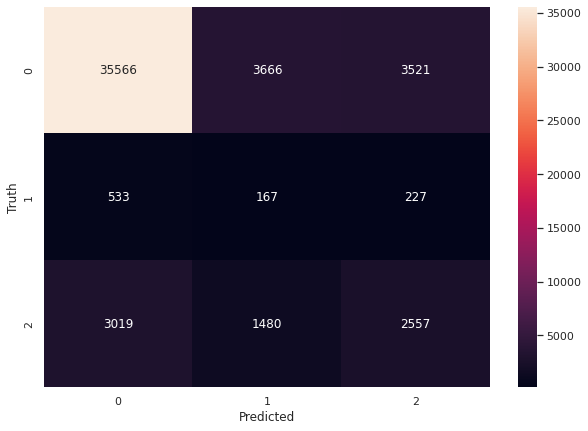

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test,prediction)

plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [10]:
X_train.shape

(20294, 9)

**7) Results for:**

    

In [ ]:
from sklearn import svm
clf = svm.SVC(C=0.1, kernel = 'poly', gamma = 0.2, degree = 3, class_weight='balanced')
clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)


kernel='poly' and class_weight='balanced' are constant

a) base features **1,3,5**

*   C=0.1
*   gamma=0.1



In [ ]:
custom_logging(Y_test, prediction)
cm=confusion_matrix(Y_test,prediction)

plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

b) base features +skewness **1,3,4,5**

*   C=0.1
*   gamma=0.1

In [ ]:
custom_logging(Y_test, prediction)
cm=confusion_matrix(Y_test,prediction)

plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

c) base features **1,3,5**

*   C=0.1
*   gamma=0.2



In [ ]:
custom_logging(Y_test, prediction)
cm=confusion_matrix(Y_test,prediction)

plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

d) base features  + skewness **1,3,4,5**

*   C=0.1
*   gamma=0.2



In [ ]:
custom_logging(Y_test, prediction)
cm=confusion_matrix(Y_test,prediction)

plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

e) Base features + poly **1,2,3,5**

*   C=0.1
*   gamma=0.1

In [ ]:
custom_logging(Y_test, prediction)
cm=confusion_matrix(Y_test,prediction)

plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

f) Base features + poly + skewness **1,2,3,4,5**

*   C=0.1
*   gamma=0.1

In [ ]:
custom_logging(Y_test, prediction)
cm=confusion_matrix(Y_test,prediction)

plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

g) Base features + poly **1,2,3,5**

*   C=0.1
*   gamma=0.2

In [ ]:
custom_logging(Y_test, prediction)
cm=confusion_matrix(Y_test,prediction)

plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

h) Base features + poly + skewness **1,2,3,4,5**

*   C=0.1
*   gamma=0.2

In [ ]:
custom_logging(Y_test, prediction)
cm=confusion_matrix(Y_test,prediction)

plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

i) Base features + poly + skewness + 2 PCs **1,2,3,4,5,6**

*   C=0.1
*   gamma=0.1

In [ ]:
custom_logging(Y_test, prediction)
cm=confusion_matrix(Y_test,prediction)

plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

j) Base features + poly + skewness + 2 PCs **1,2,3,4,5,6**

*   C=0.1
*   gamma=0.2

In [ ]:
custom_logging(Y_test, prediction)
cm=confusion_matrix(Y_test,prediction)

plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

k) Base features + poly + skewness + 14 PCs **1,2,3,4,5,6**

C=0.1
gamma=0.1

In [ ]:
custom_logging(Y_test, prediction)
cm=confusion_matrix(Y_test,prediction)

plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

l) Base features + poly + skewness + 14 PCs **1,2,3,4,5,6**

C=0.1
gamma=0.2

In [ ]:
custom_logging(Y_test, prediction)
cm=confusion_matrix(Y_test,prediction)

plt.figure(figsize=(5,3.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **IGNORE THE CODE BELOW**

In [ ]:
custom_logging(Y_test, prediction) # C=0.2 polynomial features, adjusted skewness, 14 principal components

In [ ]:
custom_logging(Y_test, prediction) # C=0.2 adjusted skewness for base features

              precision    recall  f1-score   support

           0       0.95      0.68      0.79     42744
           1       0.03      0.20      0.05       943
           2       0.33      0.65      0.44      7049

    accuracy                           0.67     50736
   macro avg       0.44      0.51      0.43     50736
weighted avg       0.84      0.67      0.73     50736

MAE: 	0.5370545569221066
MSE: 	0.9423683380637023
ACC: 	0.6656023336486913
MCC: 	0.3040761801466852
F1-Score:  72.72802892276066
Accuracy Score:  66.56023336486912


In [ ]:
custom_logging(Y_test, prediction) # C=0.1 base features

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     42723
           1       0.03      0.25      0.06       957
           2       0.34      0.60      0.43      7056

    accuracy                           0.66     50736
   macro avg       0.44      0.51      0.43     50736
weighted avg       0.84      0.66      0.72     50736

MAE: 	0.5248935666982024
MSE: 	0.8897626931567328
ACC: 	0.6575409965310628
MCC: 	0.2908320889252972
F1-Score:  72.47485597831614
Accuracy Score:  65.75409965310628
